In [1]:
import pandas as pd

# Load the dataset
file_path = 'day.csv'
bike_data = pd.read_csv(file_path)

# Initial exploration
data_overview = {
    "Shape": bike_data.shape,
    "Info": bike_data.info(),
    "Head": bike_data.head(),
    "Description": bike_data.describe(include='all')
}

# Checking for missing values
missing_values = bike_data.isnull().sum()

# Display dataset insights
print("Dataset Shape:", bike_data.shape)
print("---------------X-----------------")
print("\nDataset Info:")
bike_data.info()
print("---------------X-----------------")
print("\nMissing Values:")
print(missing_values)
print("---------------X-----------------")
print("\nHead Values:")
bike_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
Dataset Shape: (730, 16)
---------------X-----------------

Dataset Info:
<class 'pandas.core

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [2]:
pd.set_option('display.max_columns', None)

# Remove unnecessary columns
bike_data_cleaned = bike_data.drop(columns=['instant', 'dteday'])

# Map numeric categorical variables to meaningful labels

# Map 'season' (1 = Spring, 2 = Summer, 3 = Fall, 4 = Winter)
bike_data_cleaned['season'] = bike_data_cleaned['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})

# Map 'weathersit' (1 = Clear, 2 = Mist/Cloudy, 3 = Light Snow/Rain, 4 = Heavy Rain/Snow)
bike_data_cleaned['weathersit'] = bike_data_cleaned['weathersit'].map({
    1: 'Clear', 
    2: 'Mist/Cloudy', 
    3: 'Light Snow/Rain', 
    4: 'Heavy Rain/Snow'
})

# Map 'yr' (0 = 2018, 1 = 2019)
bike_data_cleaned['yr'] = bike_data_cleaned['yr'].map({0: '2018', 1: '2019'})

# Map 'holiday' (0 = No, 1 = Yes)
bike_data_cleaned['holiday'] = bike_data_cleaned['holiday'].map({0: 'No', 1: 'Yes'})

# Map 'workingday' (0 = No, 1 = Yes)
bike_data_cleaned['workingday'] = bike_data_cleaned['workingday'].map({0: 'No', 1: 'Yes'})

# Create dummy variables
# Convert categorical columns into dummy variables (one-hot encoding). This transforms text categories into numeric columns.
categorical_columns = ['season', 'weathersit', 'yr', 'holiday', 'workingday', 'weekday', 'mnth']

# Create dummy variables for all specified columns.
bike_data_with_dummies = pd.get_dummies(bike_data_cleaned, columns=categorical_columns, drop_first=True)

# Preview the final cleaned dataset
# This shows the first 5 rows of the cleaned dataset.
print("\nPreview of the Cleaned Dataset with Dummy Variables:")
print(bike_data_with_dummies.head())

# List all columns in the final dataset
print("\nColumns in the Cleaned Dataset:")
print(bike_data_with_dummies.columns.tolist())



Preview of the Cleaned Dataset with Dummy Variables:
        temp     atemp      hum  windspeed  casual  registered   cnt  \
0  14.110847  18.18125  80.5833  10.749882     331         654   985   
1  14.902598  17.68695  69.6087  16.652113     131         670   801   
2   8.050924   9.47025  43.7273  16.636703     120        1229  1349   
3   8.200000  10.60610  59.0435  10.739832     108        1454  1562   
4   9.305237  11.46350  43.6957  12.522300      82        1518  1600   

   season_Spring  season_Summer  season_Winter  weathersit_Light Snow/Rain  \
0              1              0              0                           0   
1              1              0              0                           0   
2              1              0              0                           0   
3              1              0              0                           0   
4              1              0              0                           0   

   weathersit_Mist/Cloudy  yr_2019  holiday_

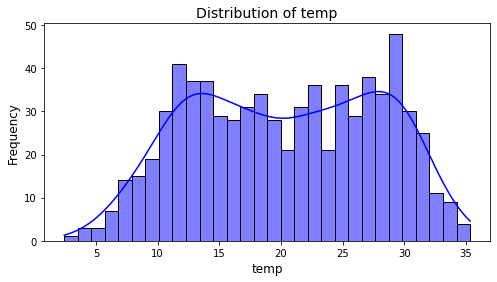

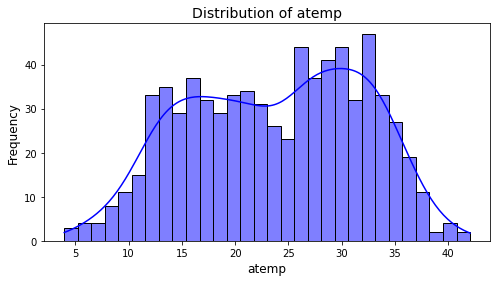

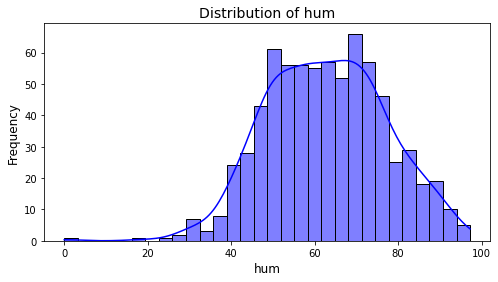

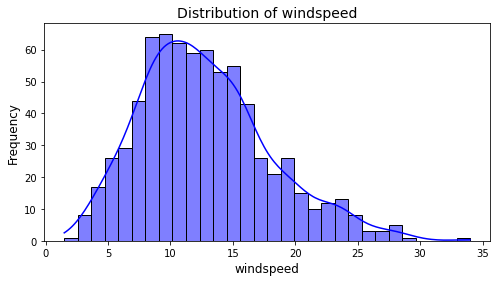

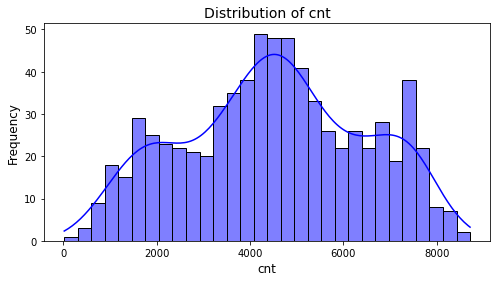

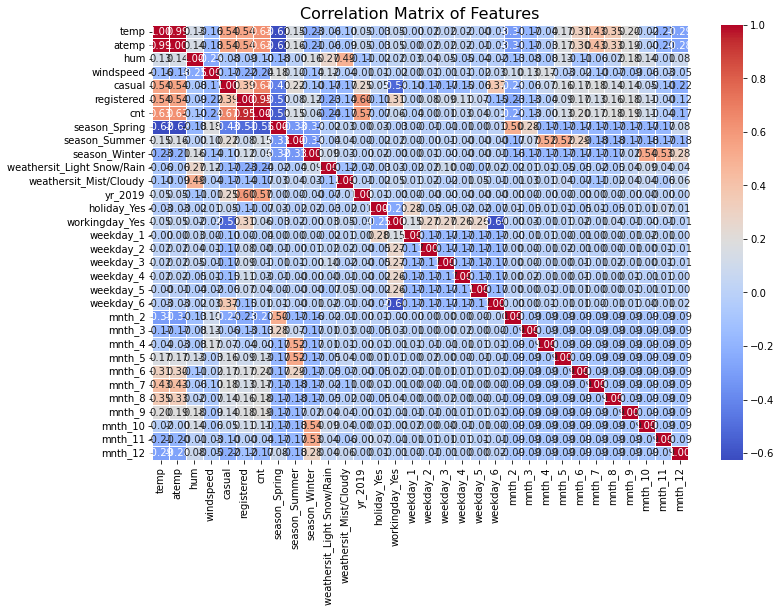

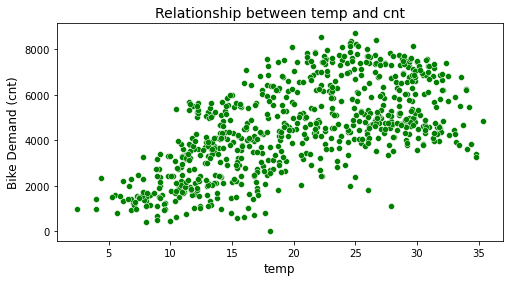

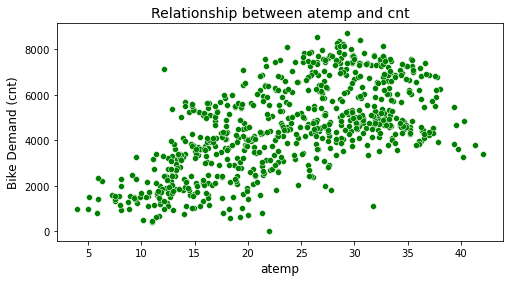

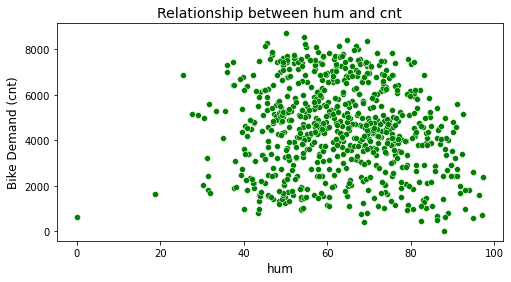

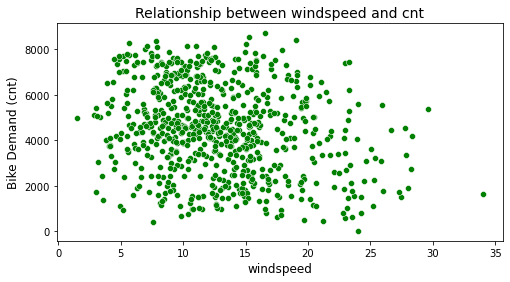

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distributions of numerical variables
numerical_columns = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

# Create histograms for numerical columns to see their distributions
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(bike_data_with_dummies[column], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.show()

# Analyze correlations between numerical variables
plt.figure(figsize=(12, 8))
correlation_matrix = bike_data_with_dummies.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Features', fontsize=16)
plt.show()

# Relationship between independent variables and target variable (cnt)
independent_vars = ['temp', 'atemp', 'hum', 'windspeed']
for var in independent_vars:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(data=bike_data_with_dummies, x=var, y='cnt', color='green')
    plt.title(f'Relationship between {var} and cnt', fontsize=14)
    plt.xlabel(var, fontsize=12)
    plt.ylabel('Bike Demand (cnt)', fontsize=12)
    plt.show()


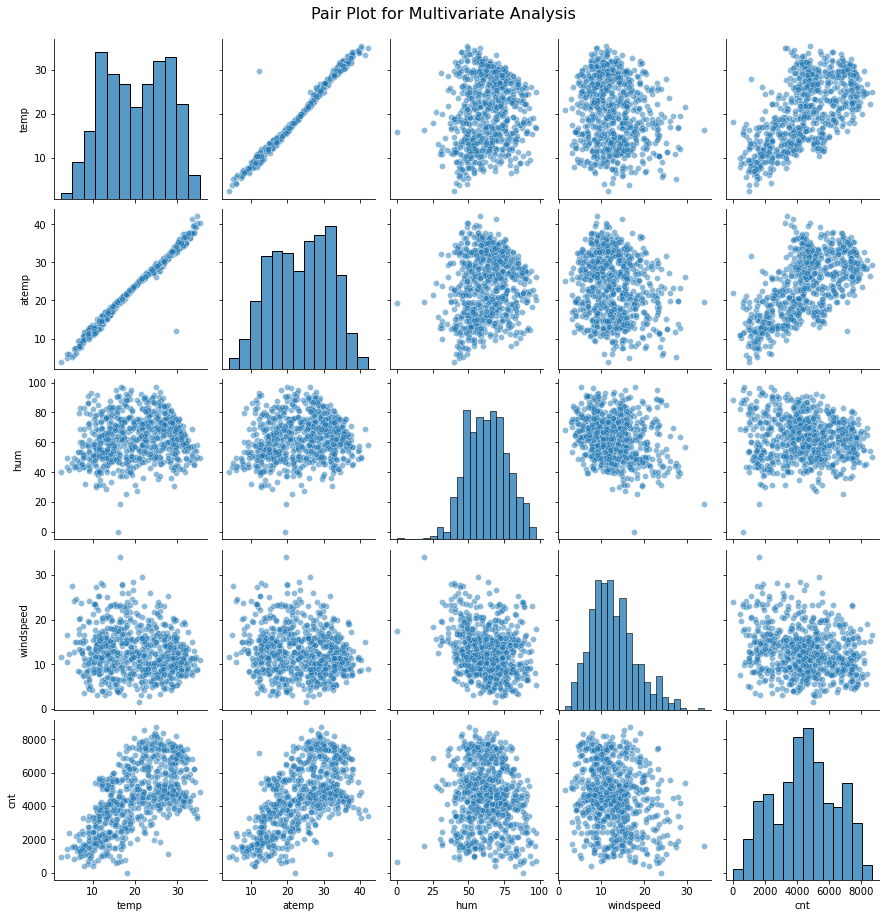

In [4]:
# Pair plot to analyze relationships among numeric variables
numeric_columns = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
sns.pairplot(bike_data_with_dummies[numeric_columns], diag_kind='hist', kind='scatter', plot_kws={'alpha': 0.5})
plt.suptitle('Pair Plot for Multivariate Analysis', y=1.02, fontsize=16)
plt.show()


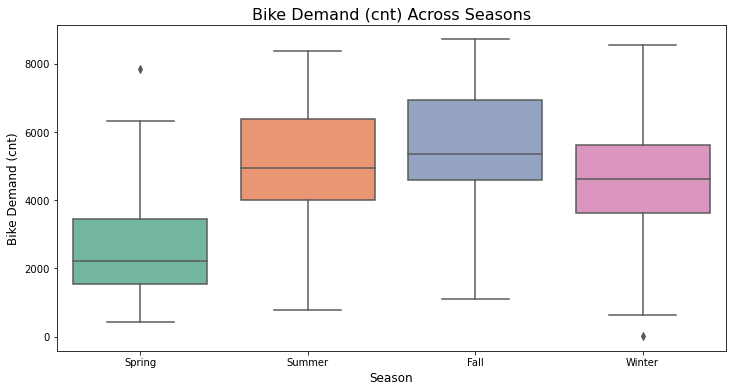

In [5]:
# Analyze the impact of 'season' on 'cnt'
plt.figure(figsize=(12, 6))
sns.boxplot(data=bike_data_cleaned, x='season', y='cnt', palette='Set2')
plt.title('Bike Demand (cnt) Across Seasons', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Bike Demand (cnt)', fontsize=12)
plt.show()


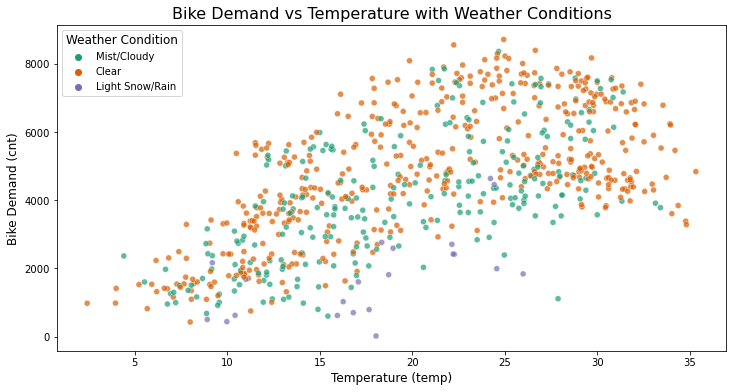

In [6]:
# Analyze the effect of 'weathersit' and 'temp' on 'cnt'
plt.figure(figsize=(12, 6))
sns.scatterplot(data=bike_data_cleaned, x='temp', y='cnt', hue='weathersit', palette='Dark2', alpha=0.7)
plt.title('Bike Demand vs Temperature with Weather Conditions', fontsize=16)
plt.xlabel('Temperature (temp)', fontsize=12)
plt.ylabel('Bike Demand (cnt)', fontsize=12)
plt.legend(title='Weather Condition', fontsize=10, title_fontsize=12)
plt.show()


In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

# Drop irrelevant columns
features = bike_data_with_dummies.drop(columns=['cnt', 'casual', 'registered'])

# Calculate Variance Inflation Factor (VIF)
# VIF detects multicollinearity among independent variables.
vif_data = pd.DataFrame()
vif_data['Feature'] = features.columns
vif_data['VIF'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]

# Display VIF values
print("Variance Inflation Factor (VIF) for Features:")
print(vif_data)


Variance Inflation Factor (VIF) for Features:
                       Feature         VIF
0                         temp  669.299976
1                        atemp  650.124309
2                          hum   33.832322
3                    windspeed    7.694092
4                season_Spring    7.477521
5                season_Summer    8.950897
6                season_Winter    9.037478
7   weathersit_Light Snow/Rain    1.332781
8       weathersit_Mist/Cloudy    2.353885
9                      yr_2019    2.060237
10                 holiday_Yes         inf
11              workingday_Yes         inf
12                   weekday_1         inf
13                   weekday_2         inf
14                   weekday_3         inf
15                   weekday_4         inf
16                   weekday_5         inf
17                   weekday_6    1.942285
18                      mnth_2    1.921869
19                      mnth_3    2.721549
20                      mnth_4    5.668840
21      

In [8]:
from sklearn.model_selection import train_test_split

# Define the target variable (y) and predictors (X)
X = features
y = bike_data_with_dummies['cnt']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Set: {X_train.shape}, Testing Set: {X_test.shape}")


Training Set: (584, 29), Testing Set: (146, 29)


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on the test set
y_pred = lr.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R-squared: {r2}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

R-squared: 0.862219721094228
Root Mean Squared Error (RMSE): 686.7314766450369


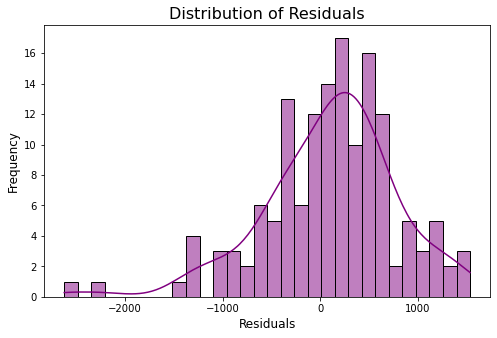

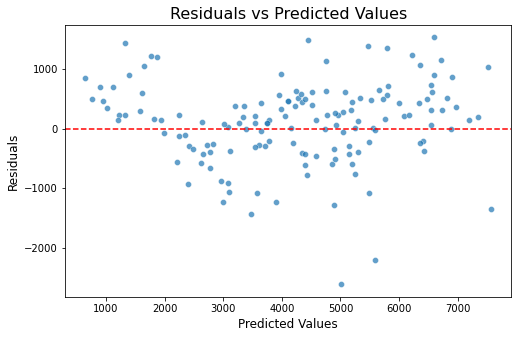

In [10]:
# Residual analysis to validate linear regression assumptions
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=30, color='purple')
plt.title('Distribution of Residuals', fontsize=16)
plt.xlabel('Residuals', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Scatter plot: Residuals vs Predicted values
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values', fontsize=16)
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.show()


In [11]:
from sklearn.preprocessing import PolynomialFeatures

# Add polynomial features (degree 2) for continuous variables
poly = PolynomialFeatures(degree=2, include_bias=False)
continuous_features = ['temp', 'atemp', 'hum', 'windspeed']
poly_features = poly.fit_transform(bike_data_with_dummies[continuous_features])

# Create a new DataFrame for polynomial features
poly_feature_names = poly.get_feature_names_out(continuous_features)
poly_df = pd.DataFrame(poly_features, columns=poly_feature_names)

# Combine polynomial features with the rest of the dataset
bike_data_refined = bike_data_with_dummies.drop(columns=continuous_features).reset_index(drop=True)
bike_data_refined = pd.concat([bike_data_refined, poly_df], axis=1)

print("Polynomial features added. Dataset now has shape:", bike_data_refined.shape)


Polynomial features added. Dataset now has shape: (730, 42)


In [12]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score

# Split data into training and test sets
X = bike_data_refined.drop(columns=['cnt', 'casual', 'registered'])
y = bike_data_refined['cnt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Ridge Regression
ridge = Ridge(alpha=1.0)  # Regularization strength
ridge.fit(X_train, y_train)
ridge_scores = cross_val_score(ridge, X_train, y_train, cv=5, scoring='r2')

# Lasso Regression
lasso = Lasso(alpha=0.1)  # Regularization strength
lasso.fit(X_train, y_train)
lasso_scores = cross_val_score(lasso, X_train, y_train, cv=5, scoring='r2')

print("Ridge R2 (Cross-Validation):", ridge_scores.mean())
print("Lasso R2 (Cross-Validation):", lasso_scores.mean())


Ridge R2 (Cross-Validation): 0.8465836941024676
Lasso R2 (Cross-Validation): 0.845410675767851


In [15]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Ridge and Lasso
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}

# Ridge Regression
ridge_cv = GridSearchCV(Ridge(), param_grid, cv=5, scoring='r2')
ridge_cv.fit(X_train, y_train)

# Lasso Regression
lasso_cv = GridSearchCV(Lasso(), param_grid, cv=5, scoring='r2')
lasso_cv.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}, scoring='r2')

In [16]:
print("Best Ridge alpha:", ridge_cv.best_params_)
print("Best Lasso alpha:", lasso_cv.best_params_)
print("Best Ridge R2 (Cross-Validation):", ridge_cv.best_score_)
print("Best Lasso R2 (Cross-Validation):", lasso_cv.best_score_)

Best Ridge alpha: {'alpha': 0.1}
Best Lasso alpha: {'alpha': 1.0}
Best Ridge R2 (Cross-Validation): 0.8468958936859619
Best Lasso R2 (Cross-Validation): 0.8464125360627633
